# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
!pip install citipy

  Using cached citipy-0.0.5.tar.gz (557 kB)
  Using cached kdtree-0.16-py2.py3-none-any.whl (7.7 kB)
  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559707 sha256=549deea40ac04cc9d97e4ee84cfe62d50b6f3dadc87b6a374a6f90d5f5d8c181
  Stored in directory: c:\users\xiao_\appdata\local\pip\cache\wheels\6d\df\5e\ad8eb9cc5ee7f4ba76865167c09f9a7edff405c669111d8353
Successfully built citipy


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"
final_url = f'{url}appid={weather_api_key}&units={units}&q='

In [5]:
weather = requests.get(final_url+"london").json()
weather

{'coord': {'lon': -0.1257, 'lat': 51.5085},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 3.27,
  'feels_like': 3.27,
  'temp_min': 2.22,
  'temp_max': 5,
  'pressure': 1031,
  'humidity': 65},
 'visibility': 10000,
 'wind': {'speed': 1.03, 'deg': 0},
 'clouds': {'all': 3},
 'dt': 1618620298,
 'sys': {'type': 1,
  'id': 1414,
  'country': 'GB',
  'sunrise': 1618635603,
  'sunset': 1618685976},
 'timezone': 3600,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"
final_url = f'{url}appid={weather_api_key}&units={units}&q='

city_list = []
datacounter = 0
for city in cities:
    weather = requests.get(final_url+city).json()
    try:

        weather_data = {
            "City":weather["name"],
            "Lat":weather["coord"]["lat"],
            "Lng":weather["coord"]["lon"],
            "Max Temp":weather["main"]["temp_max"],
            "Humidity":weather["main"]["humidity"],
            "Cloudiness":weather["clouds"]["all"],
            "Wind Speed":weather["wind"]["speed"],
            "Country":weather["sys"]["country"],
            "Date":weather["dt"]    
        }
        city_list.append(weather_data)
        datacounter = datacounter + 1
        print (f'city_list:{weather["name"]},id={weather["id"]}')
    except:
        
        print("no data found:"+city)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
cities_df = pd.DataFrame(city_list)

In [8]:
cities_df.to_csv("cities.csv")

In [9]:
cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,5.480000e+02
mean,19.597827,21.847047,14.778157,70.186131,52.509124,3.521496,1.618621e+09
std,33.841548,91.708338,11.828589,22.128386,40.776803,2.696341,9.563827e+01
min,-54.800000,-179.166700,-27.510000,6.000000,0.000000,0.190000,1.618620e+09
25%,-8.441650,-58.627400,6.790000,60.000000,7.000000,1.597500,1.618621e+09
50%,21.768200,25.651700,16.655000,74.000000,56.000000,2.910000,1.618621e+09
75%,48.015400,103.256400,25.005000,88.000000,98.000000,4.630000,1.618621e+09
max,78.218600,178.416700,33.130000,100.000000,100.000000,22.820000,1.618621e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
humidity = cities_df.loc[cities_df["Humidity"]>100]
humidity
# no cities with humidity >100%

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

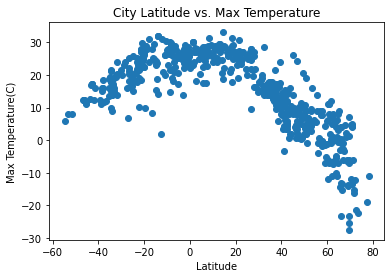

In [11]:
plt.scatter(cities_df["Lat"], cities_df["Max Temp"])
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)");

## Latitude vs. Humidity Plot

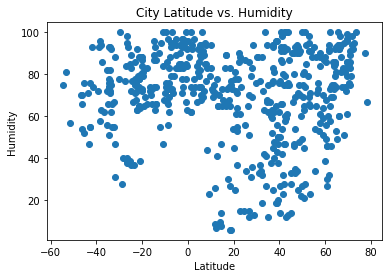

In [12]:
plt.scatter(cities_df["Lat"], cities_df["Humidity"])
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

## Latitude vs. Cloudiness Plot

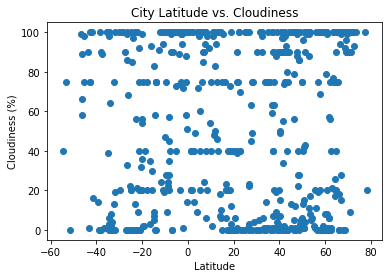

In [13]:
plt.scatter(cities_df["Lat"], cities_df["Cloudiness"])
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)");

## Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed')

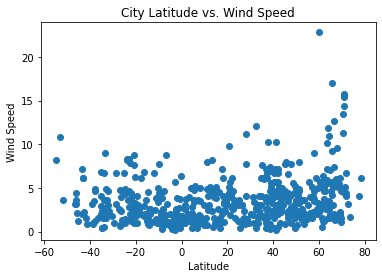

In [14]:
plt.scatter(cities_df["Lat"], cities_df["Wind Speed"])
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

## Linear Regression

In [20]:
from scipy.stats import linregress

def regress_func(x_values,y_values):  
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    print (rvalue**2)
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#     plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    return line_eq

In [17]:
north_df = cities_df.loc[cities_df['Lat'] >= 0]
south_df = cities_df.loc[cities_df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

0.7954464019075845


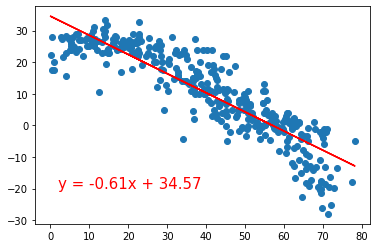

In [22]:
max_temp = regress_func(north_df['Lat'], north_df['Max Temp'])
plt.annotate(max_temp,(2,-20),fontsize=15,color="red")
plt.show()

As latitude increases, max temperature decreases. It is an inverse proportion. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


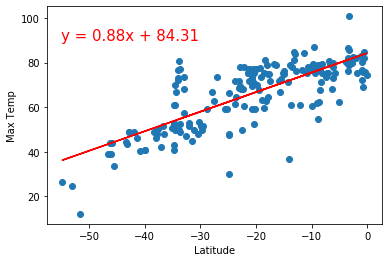

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


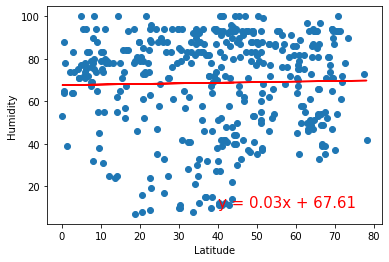

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


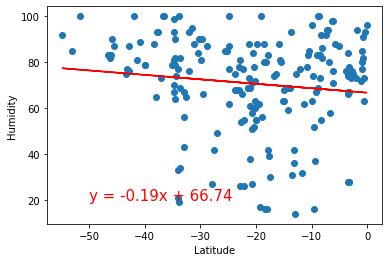

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


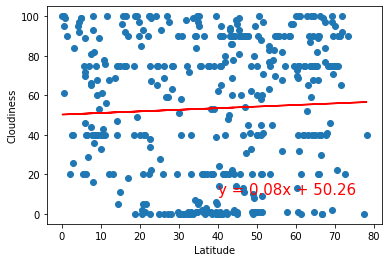

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


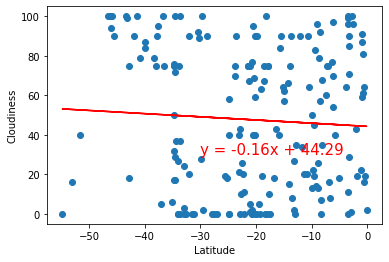

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


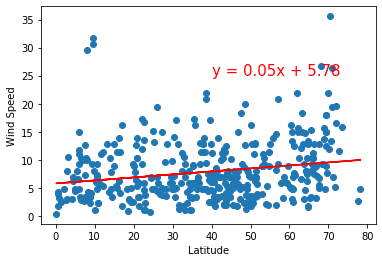

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


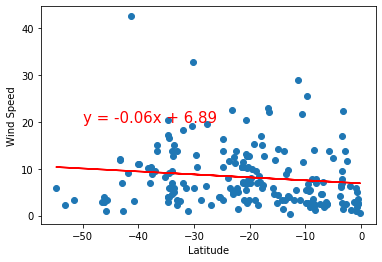